ANALISIS EXPLORATORIO DE DATOS
- En este archivo presentamos un EDA preliminar sobre los datos sobre Google Maps y Yelp que nos permita observar de forma inicial cada uno de los dataset. identificando tipos de datos, valores faltantes, vista preliminar de los datos, descripcion de datos y correlaciones entre estos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
user_yelp=pd.read_parquet('/content/drive/MyDrive/Yelp/user.parquet')

In [ ]:
user_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 353.4+ MB


In [ ]:
user_yelp.head(5)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [16]:
user_yelp.sort_values(by='review_count', ascending=False)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
17169,Hi10sGSZNxQH3NLyWSZ1oA,Fox,17473,2009-05-26 11:33:58,206296,185823,195814,"2014,2015,2016,2017,2018,2019,20,20,2021","uZcWE40gWJHjLT_VyNBp1Q, N52nbyDKZte4PUfJVNpkGQ...",3493,...,431,402,130,45,2408,6565,7655,7655,1644,4053
795339,8k3aO-mPeyhbR5HUucA5aA,Victor,16978,2007-12-08 14:56:45,152979,84992,125516,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...","Isb9ZKTK4L5nkOpyXypDPQ, d3rfsXGWtS7fpGsYfy_C7Q...",1462,...,327,222,55,84,2204,3786,3618,3618,2731,256
2003720,hWDybu_KvYLSdEFzGrniTw,Bruce,16567,2009-03-08 21:47:44,173089,98459,144849,"2010,2011,2012,2013,2014,2015,2016,2017,2018,2...","sZ0Qxjn12H8jjHBPLQW32w, Lkk3DqzhvqwpiQKwwAyZcw...",867,...,586,541,34,76,2466,5264,6728,6728,5811,2224
1992620,hWDybu_KvYLSdEFzGrniTw,Bruce,16567,2009-03-08 21:47:44,173089,98459,144849,"2010,2011,2012,2013,2014,2015,2016,2017,2018,2...","sZ0Qxjn12H8jjHBPLQW32w, Lkk3DqzhvqwpiQKwwAyZcw...",867,...,586,541,34,76,2466,5264,6728,6728,5811,2224
4723,hWDybu_KvYLSdEFzGrniTw,Bruce,16567,2009-03-08 21:47:44,173089,98459,144849,"2010,2011,2012,2013,2014,2015,2016,2017,2018,2...","sZ0Qxjn12H8jjHBPLQW32w, Lkk3DqzhvqwpiQKwwAyZcw...",867,...,586,541,34,76,2466,5264,6728,6728,5811,2224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165484,wPILFUtXRSMd0xeYOstioA,Jeanne,0,2022-01-19 17:15:47,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1115141,ytY6AUF84s1jIv8e7-cDYg,Jack,0,2016-12-01 23:21:24,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
543851,889Zs1Xyz6kucIShNdCJjg,Dawn,0,2022-01-18 05:42:13,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1875293,grNJBR-Vhill3Cd4nepbyQ,Meisha,0,2020-12-17 16:02:02,0,0,0,,"4Tza2YYayyIr13n5GQkoXQ, 37vxsMWusZi6KpIYAxzopw...",0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#Observamos los valores duplicados por ID de usuario
user_yelp.loc[user_yelp.duplicated(subset=['user_id'])]

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
1987897,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1987898,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
1987899,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
1987900,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
1987901,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105592,4QGxxakRZeOlg_qDuxmTeQ,Jennilee,38,2012-01-19 23:33:02,74,9,6,,kmwNG5LZSHFmveg6wYYdrw,0,...,1,0,0,0,1,4,0,0,1,0
2105593,tmelBbVBGAzXBVfH2u_R6g,Gerry,19,2009-06-09 16:34:54,14,5,2,,"BFYdCAMFyjYHDwesndEXEg, _9fTIqfSJc7g3V_o76XRVg...",1,...,1,0,0,0,0,1,0,0,0,0
2105594,tpBznnD6uJN3m_pJubj09w,Emily,26,2013-08-13 23:18:11,4,1,2,,"bKV3ly2MuK-K1cptMrFknQ, liel18zRoSB4tEkUP7i6Cg...",0,...,0,0,0,0,1,0,0,0,0,0
2105595,Kst_srPw7GdYydMFYdCtzw,Heatheranne,25,2015-01-10 00:06:25,21,2,5,,"dzHTk52vbGtbktRm_B-wEg, fOfFLV7IbBDN6lzARaLqdg...",0,...,0,0,0,0,0,1,0,0,0,0


In [18]:
#Eliminamos  los valores duplicados por ID de usuario
user_yelp = user_yelp.loc[~user_yelp.duplicated(subset=['user_id'])] .reset_index(drop=True).copy()
user_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


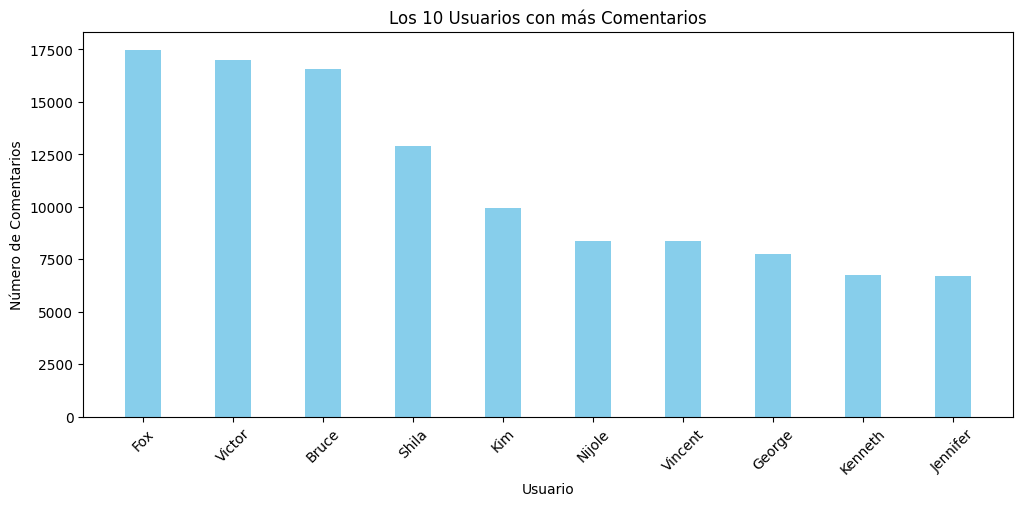

In [20]:
# Observamos los 10 Usuarios con mayor numero de comentarios realizados
df_sorted = user_yelp.sort_values(by='review_count', ascending=False)

# Seleccionar los 10 Usuarios con más comentarios
top_10_user = df_sorted.head(10)

# Crear un gráfico de barras
plt.figure(figsize=(12, 5))
plt.bar(top_10_user['name'], top_10_user['review_count'], color='skyblue', width=0.4)
plt.xlabel('Usuario')
plt.ylabel('Número de Comentarios')
plt.title('Los 10 Usuarios con más Comentarios')
plt.xticks(rotation=45)
plt.show()

* En este primer acercamiento al archivo user.parquet podemos observar que Yelp es una plataforma mayormente enfocada a calificaciones sobre comercios siendo de cierta manera una Red Social sobre recomendaciones y comentarios de los visitantes.

In [21]:
#Observamos si hay datos nulos
user_yelp.isnull().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

In [22]:
user_yelp.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06
mean,2.339441e+01,4.229634e+01,1.697054e+01,2.379291e+01,1.465740e+00,3.630494e+00,1.807072e+00,2.922631e-01,1.793176e-01,1.336493e-01,6.390723e-02,1.443135e+00,3.011841e+00,2.829308e+00,2.829308e+00,1.056448e+00,1.226859e+00
std,8.256699e+01,6.414806e+02,4.078034e+02,5.653513e+02,1.813075e+01,1.183337e+00,7.360184e+01,1.282467e+01,1.515525e+01,1.135682e+01,1.004363e+01,6.016790e+01,1.193898e+02,9.666385e+01,9.666385e+01,3.217973e+01,9.515751e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.880000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.700000e+01,1.300000e+01,2.000000e+00,3.000000e+00,0.000000e+00,4.560000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.747300e+04,2.062960e+05,1.858230e+05,1.998780e+05,1.249700e+04,5.000000e+00,2.578400e+04,1.350100e+04,1.418000e+04,1.365400e+04,1.266900e+04,5.903100e+04,1.010970e+05,4.996700e+04,4.996700e+04,1.593400e+04,8.263000e+04


* Observamos una descripción estadistica de los diferentes datos y votos correspondientes a cada calificación disponible dentro de la plataforma acumulada por los usuarios.

In [23]:
user_yelp.corr()

<ipython-input-23-c355f2630eef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  user_yelp.corr()


,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
review_count,1.000000,0.573369,0.476440,0.494112,0.534190,0.045380,0.262447,0.189265,0.135110,0.120866,0.083666,0.209687,0.267455,0.301840,0.301840,0.333263,0.150500
useful,0.573369,1.000000,0.954307,0.991841,0.643238,0.010973,0.614303,0.426293,0.360189,0.262687,0.203699,0.433614,0.663199,0.735886,0.735886,0.700046,0.546947
funny,0.476440,0.954307,1.000000,0.964872,0.590613,0.007060,0.661326,0.476574,0.409498,0.303063,0.235382,0.441846,0.673973,0.772529,0.772529,0.757250,0.581671
cool,0.494112,0.991841,0.964872,1.000000,0.600828,0.010437,0.630804,0.436831,0.373656,0.270682,0.210513,0.436336,0.671736,0.754928,0.754928,0.707368,0.574912
fans,0.534190,0.643238,0.590613,0.600828,1.000000,0.019413,0.425691,0.257129,0.204807,0.199979,0.121405,0.321864,0.526995,0.484914,0.484914,0.459413,0.296039
average_stars,0.045380,0.010973,0.007060,0.010437,0.019413,1.000000,0.005928,0.004485,0.002745,0.002601,0.001425,0.004902,0.006592,0.007309,0.007309,0.007370,0.003890
compliment_hot,0.262447,0.614303,0.661326,0.630804,0.425691,0.005928,1.000000,0.627411,0.609600,0.546024,0.434293,0.721171,0.682982,0.882702,0.882702,0.802483,0.721363
compliment_more,0.189265,0.426293,0.476574,0.436831,0.257129,0.004485,0.627411,1.000000,0.961363,0.919417,0.931902,0.448723,0.563017,0.666685,0.666685,0.803428,0.825297
compliment_profile,0.135110,0.360189,0.409498,0.373656,0.204807,0.002745,0.609600,0.961363,1.000000,0.890371,0.908688,0.421115,0.558923,0.639783,0.639783,0.774470,0.785596
compliment_cute,0.120866,0.262687,0.303063,0.270682,0.199979,0.002601,0.546024,0.919417,0.890371,1.000000,0.957817,0.357084,0.438571,0.526734,0.526734,0.641525,0.764134


* De igual manera presentamos la tabla con las diferentes correlaciones entre los campos numericos

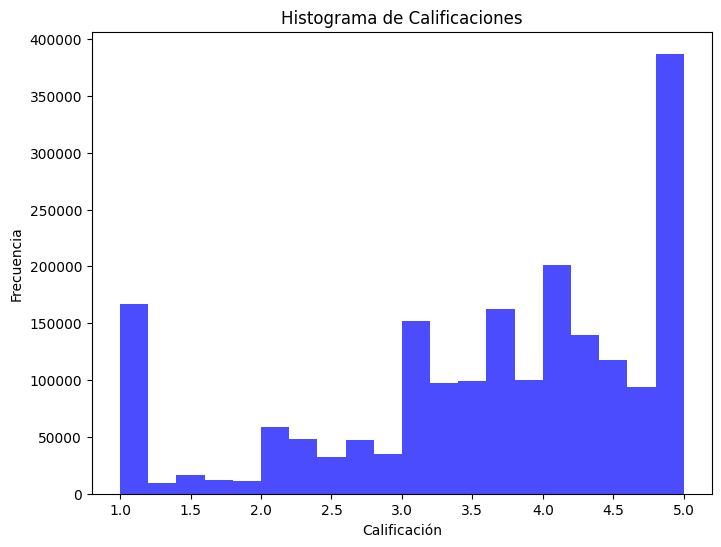

In [24]:
plt.figure(figsize=(8, 6))
plt.hist(user_yelp['average_stars'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.title('Histograma de Calificaciones')
plt.show()

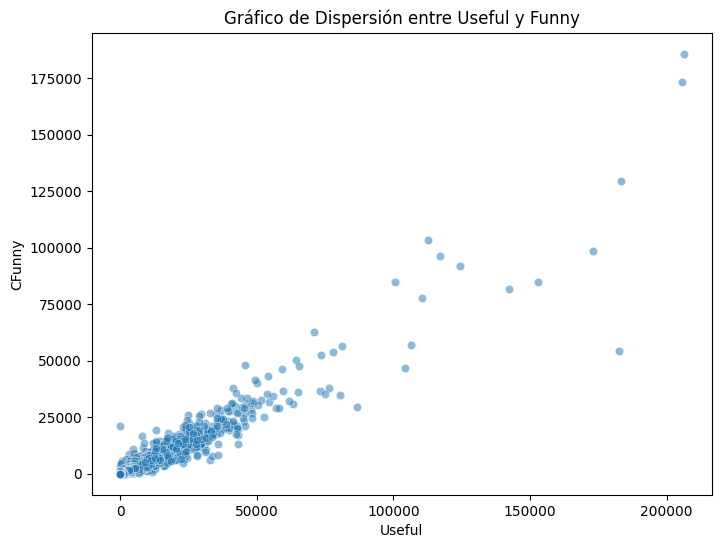

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='useful', y='funny', data=user_yelp, alpha=0.5)
plt.xlabel('Useful')
plt.ylabel('CFunny')
plt.title('Gráfico de Dispersión entre Useful y Funny')
plt.show()

In [7]:
bussiness_yelp=pd.read_pickle('/content/drive/MyDrive/Yelp/business.pkl')

In [ ]:
bussiness_yelp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null

* Observamos que se repiten los campos dos veces, asi que procedemos a eliminar estos campos repetidos

In [8]:
df_copy=bussiness_yelp.iloc[:, :14]
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
dtypes: object(14)
memory usage: 17.2+ MB


In [27]:
#Observamos si tenemos Id de comercios duplicados
df_copy.loc[df_copy.duplicated(subset=['business_id'])].count()

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64

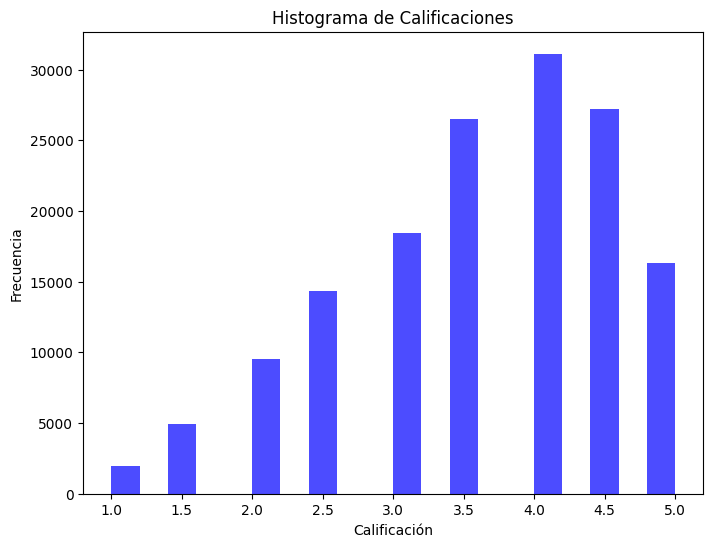

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df_copy['stars'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.title('Histograma de Calificaciones')
plt.show()

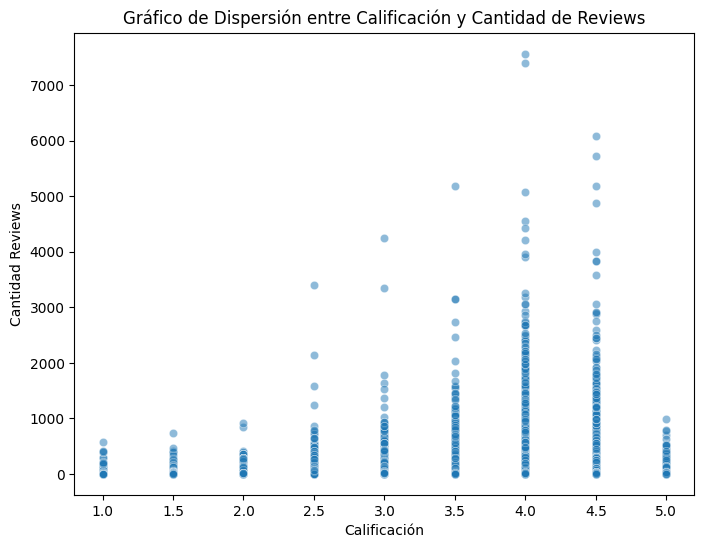

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='stars', y='review_count', data=df_copy, alpha=0.5)
plt.xlabel('Calificación')
plt.ylabel('Cantidad Reviews')
plt.title('Gráfico de Dispersión entre Calificación y Cantidad de Reviews')
plt.show()

In [ ]:
df_copy.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


*Ahora vamos a observa las categorias presentes

In [37]:
# Crear un set para almacenar todas las categorías únicas
categorias_unicas = set()

# Iteramos sobre cada fila
for index, row in df_copy.iterrows():

    # Obtener la cadena de categorías de la fila actual
    categorias_cadena = row['categories']

    # Verificar si la cadena no es nula
    if isinstance(categorias_cadena, str):
        # Dividir la cadena en categorías individuales utilizando la coma como separador
        categorias_individuales = categorias_cadena.split(',')

        # Agregar las categorías individuales al conjunto de categorías únicas
        categorias_unicas.update(categorias_individuales)

# Convertir el conjunto de categorías únicas en una lista
lista_categorias = list(categorias_unicas)

In [38]:
#Observamos algunas categorias
lista_categorias[:10]

['Valet Services',
 ' Scavenger Hunts',
 ' Pickleball',
 ' Mongolian',
 ' Local Flavor',
 ' Florists',
 ' Homeless Shelters',
 'Pet Photography',
 ' Parks',
 ' Thai']

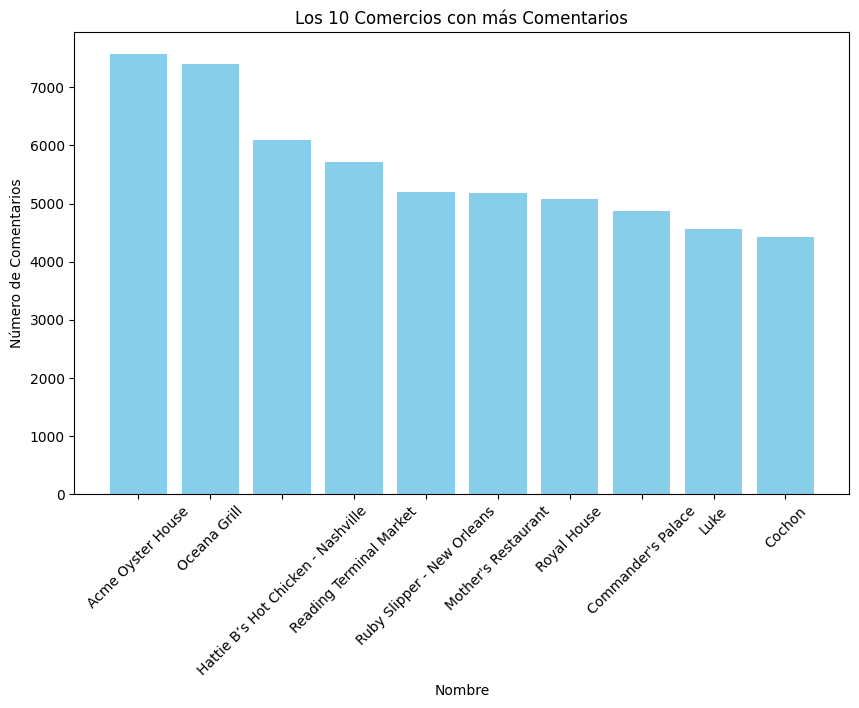

In [10]:
# Ordenar el DataFrame por la columna 'Total_Comentarios' en orden descendente
df_sorted = df_copy.sort_values(by='review_count', ascending=False)

# Seleccionar los 10 ID con más comentarios
top_10_ids = df_sorted.head(10)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10_ids['name'], top_10_ids['review_count'], color='skyblue')
plt.xlabel('Nombre')
plt.ylabel('Número de Comentarios')
plt.title('Los 10 Comercios con más Comentarios')
plt.xticks(rotation=45)
plt.show()

*En este Archivo Bussiness observamos que corresponde a la información general sobre cada establecimiento de comercio, incluyendo su calificacion y cuantos comentarios ha obtenido

In [ ]:
df_copy.isnull().sum()

business_id         0
name                0
address             0
city                0
state               3
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [40]:
tips_yelp=pd.read_json('/content/drive/MyDrive/Yelp/tip.json', lines=True)

In [ ]:
tips_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[ns]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB


In [ ]:
tips_yelp.head(5)

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [41]:
#Observamos valores duplicados por user_id
tips_yelp.loc[tips_yelp.duplicated(subset=['user_id'])]

,user_id,business_id,text,date,compliment_count
85,trf3Qcz8qvCDKXiTgjUcEg,Xk6GSFf8KGGZ3cyYijwRcw,Bangers and mash. Just like last time.,2012-08-05 02:24:50,0
119,2eC4qmjUNR7-LG8s6t4Ehg,G6h-9AZro_Ni_4eRR9CkRw,Pizza spice!,2012-03-18 17:03:36,0
188,VL12EhEdT4OWqGq0nIqkzw,xODBZmX4EmlVvbqtKN7YKg,$5 burritos,2012-05-22 01:14:26,0
189,LkXNQQaIc5yrKu9Ap87RrA,SekWxm92phAL_P_KySUnxA,Fried Pickles are good.,2011-10-12 01:02:11,0
199,Rr4cLb6Go91FT134o6RsKg,hVRebPv7EKMUGVV2m5IKaQ,Two steak burritos,2015-05-25 11:55:28,0
...,...,...,...,...,...
908909,FowxkbAixI3hlREeCgIa_Q,kfNv-JZpuN6TVNSO6hHdkw,Great experience with a phenomenal food with a...,2021-05-09 23:21:10,0
908910,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11 19:18:57,0
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0
908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0


*En este dataset es posible los valores duplicados entre user_id y business_id, ya que corresponde a comentarios que genera un Usuario sobre un comercio

In [ ]:
tips_yelp.describe()

,compliment_count
count,908915.000000
mean,0.012525
std,0.120763
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,6.000000


In [42]:
checkin_yelp=pd.read_json('/content/drive/MyDrive/Yelp/checkin.json',lines=True)

In [ ]:
checkin_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [ ]:
checkin_yelp.head(5)

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [ ]:
checkin_yelp.describe()

,business_id,date
count,131930,131930
unique,131930,131930
top,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
freq,1,1


In [44]:
meta_google=pd.read_json('/content/drive/MyDrive/Google Maps/metadata-sitios/1.json', lines=True)

In [ ]:
meta_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275001 entries, 0 to 275000
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              274994 non-null  object 
 1   address           264939 non-null  object 
 2   gmap_id           275001 non-null  object 
 3   description       13155 non-null   object 
 4   latitude          275001 non-null  float64
 5   longitude         275001 non-null  float64
 6   category          272740 non-null  object 
 7   avg_rating        275001 non-null  float64
 8   num_of_reviews    275001 non-null  int64  
 9   price             13450 non-null   object 
 10  hours             192448 non-null  object 
 11  MISC              194972 non-null  object 
 12  state             195523 non-null  object 
 13  relative_results  238771 non-null  object 
 14  url               275001 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 31.5+ MB


In [ ]:
meta_google.head(5)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


In [ ]:
meta_google.describe()

,latitude,longitude,avg_rating,num_of_reviews
count,275001.000000,275001.000000,275001.000000,275001.000000
mean,37.490112,-92.274708,4.307216,19.722750
std,5.405780,16.414617,0.790101,37.642092
min,-1.766059,-176.644648,1.000000,1.000000
25%,33.759405,-98.924254,4.000000,4.000000
50%,38.411790,-87.609055,4.500000,8.000000
75%,41.320476,-80.252418,5.000000,18.000000
max,70.398544,180.000000,5.000000,2114.000000


In [ ]:
meta_google.corr()

<ipython-input-25-e300c6db12c3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  meta_google.corr()


,latitude,longitude,avg_rating,num_of_reviews
latitude,1.000000,-0.003821,0.011127,-0.041317
longitude,-0.003821,1.000000,-0.001045,0.015258
avg_rating,0.011127,-0.001045,1.000000,0.085392
num_of_reviews,-0.041317,0.015258,0.085392,1.000000


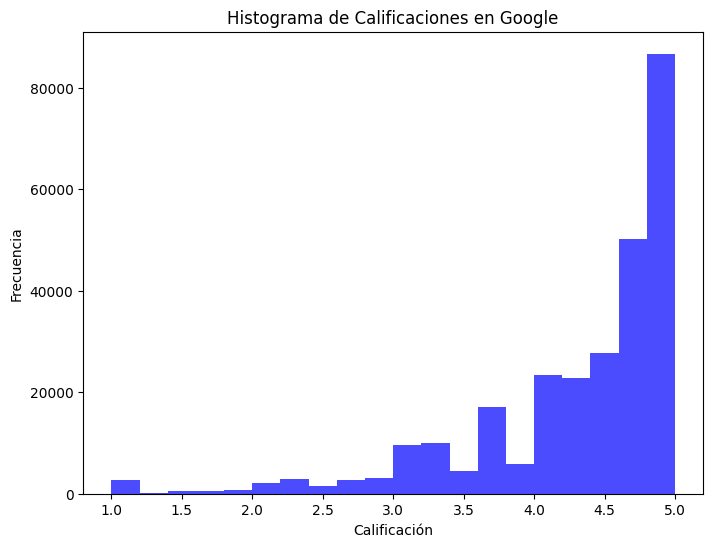

In [46]:
plt.figure(figsize=(8, 6))
plt.hist(meta_google['avg_rating'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.title('Histograma de Calificaciones en Google')
plt.show()

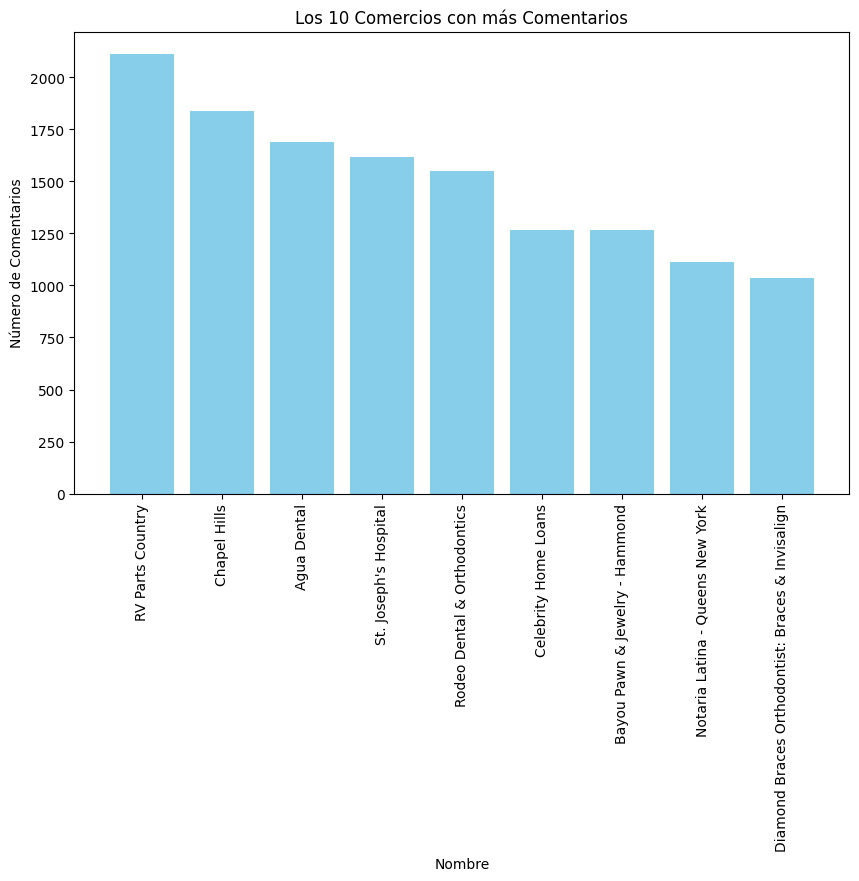

In [49]:
# Ordenar el DataFrame por la columna 'Total_Comentarios' en orden descendente
df_sorted = meta_google.sort_values(by='num_of_reviews', ascending=False)

# Seleccionar los 10 Comercios con más comentarios
top_10_ids = df_sorted.head(10)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10_ids['name'], top_10_ids['num_of_reviews'], color='skyblue')
plt.xlabel('Nombre')
plt.ylabel('Número de Comentarios')
plt.title('Los 10 Comercios con más Comentarios')
plt.xticks(rotation=90)
plt.show()

In [51]:
reviews_google=pd.read_json('/content/drive/MyDrive/Google Maps/reviews-estados/review-Alabama/1.json', lines=True)

In [ ]:
reviews_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  150000 non-null  float64
 1   name     150000 non-null  object 
 2   time     150000 non-null  int64  
 3   rating   150000 non-null  int64  
 4   text     82943 non-null   object 
 5   pics     3087 non-null    object 
 6   resp     20893 non-null   object 
 7   gmap_id  150000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 9.2+ MB


In [ ]:
reviews_google.head(5)

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.140438e+20,Kanisha Mixon,1597168272670,5,Very Personable staff! Beautiful and clean env...,None,None,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf
1,1.160090e+20,Brandie Hodges,1609899039594,5,Best clothing intown,None,None,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf
2,1.062399e+20,Sharon King,1547235290843,4,None,None,None,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf
3,1.049701e+20,Veronica Pierce,1517709403534,5,None,None,None,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf
4,1.105875e+20,Whitney Waldon Collier,1535245718492,5,None,None,None,0x8862134e67ff5c87:0x38b5e2ae99cd1fcf


In [ ]:
reviews_google.describe()

,user_id,time,rating
count,1.500000e+05,1.500000e+05,150000.000000
mean,1.095481e+20,1.559018e+12,4.369980
std,5.156661e+18,4.343086e+10,1.135892
min,1.000001e+20,1.219667e+12,1.000000
25%,1.052488e+20,1.529157e+12,4.000000
50%,1.095565e+20,1.560898e+12,5.000000
75%,1.139694e+20,1.595283e+12,5.000000
max,1.184467e+20,1.631149e+12,5.000000


In [ ]:
reviews_google.corr()

<ipython-input-30-b064452259d8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  reviews_google.corr()


,user_id,time,rating
user_id,1.000000,0.001679,-0.000802
time,0.001679,1.000000,0.069147
rating,-0.000802,0.069147,1.000000


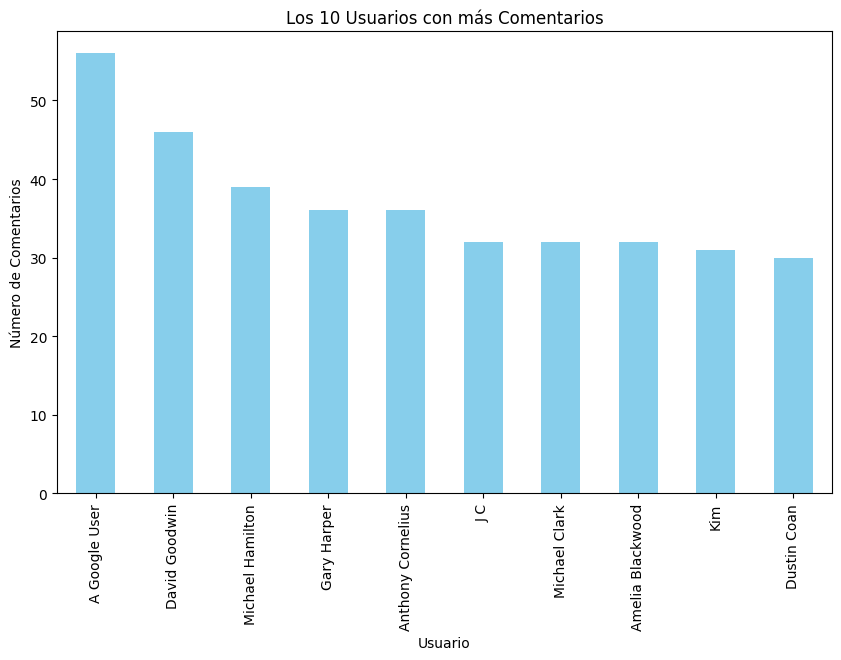

In [54]:
# Observamos los 10 Usuarios con mayor numero de comentarios realizados
top_10_ids = reviews_google['name'].value_counts().head(10)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
top_10_ids.plot(kind='bar', color='skyblue')
plt.xlabel('Usuario')
plt.ylabel('Número de Comentarios')
plt.title('Los 10 Usuarios con más Comentarios')
plt.xticks(rotation=90)
plt.show()